# <center> Car brand Classification  using Resnet50 

In [1]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
#resize all the images
IMAGE_SIZE=[224,224]
train_path='Datasets/train'
test_path='Datasets/test'

In [3]:
resnet=ResNet50(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

94773248/94765736 [==============================] - 13s 0us/step


In [4]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [5]:
#dont train existing weights
for layer in resnet.layers:
    layer.trainable=False

In [23]:
#getting no of output class
folders=glob('Datasets/train/*')

In [24]:
folders

['Datasets/train\\audi',
 'Datasets/train\\lamborghini',
 'Datasets/train\\mercedes']

In [25]:
#layers
x=Flatten()(resnet.output)

In [26]:
prediction=Dense(len(folders),activation='softmax')(x)

#create model object
model=Model(inputs=resnet.input,outputs=prediction)

In [27]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [28]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [29]:
#use image data generator to import the images from the dataset
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [30]:
#provide same target size as initialized for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [31]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [32]:
#fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
2/2 [==============================] - 5s 2s/step - loss: 8.2753 - accuracy: 0.3125 - val_loss: 8.0490 - val_accuracy: 0.1552
Epoch 2/50
2/2 [==============================] - 3s 2s/step - loss: 6.0207 - accuracy: 0.3594 - val_loss: 2.4177 - val_accuracy: 0.5690
Epoch 3/50
2/2 [==============================] - 3s 2s/step - loss: 6.0944 - accuracy: 0.4219 - val_loss: 7.0964 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 3s 2s/step - loss: 6.4217 - accuracy: 0.3906 - val_loss: 2.4156 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 3s 2s/step - loss: 2.5681 - accuracy: 0.4375 - val_loss: 4.5932 - val_accuracy: 0.1552
Epoch 6/50
2/2 [==============================] - 3s 2s/step - loss: 4.8526 - accuracy: 0.3594 - val_loss: 5.4912 - val_accuracy: 0.1552
Epoch 7/50
2/2 [==============================] - 3s 2s/step - loss: 2.8637 - accuracy: 0.4375 - val_loss: 1.2712 - val_accuracy: 0.5517
Epoch 8/50
2/2 [=========================

In [34]:
r.history

{'loss': [8.275317192077637,
  6.02067756652832,
  6.094384670257568,
  6.421717643737793,
  2.5680837631225586,
  4.852588653564453,
  2.8636724948883057,
  2.002469539642334,
  3.321887493133545,
  2.475299835205078,
  0.9690072536468506,
  1.966247797012329,
  0.8788478374481201,
  1.397334337234497,
  0.9984029531478882,
  0.7917584180831909,
  0.8973037004470825,
  0.45286622643470764,
  0.8142164945602417,
  0.5457210540771484,
  0.5921082496643066,
  0.4459567666053772,
  0.5075167417526245,
  0.4651266038417816,
  0.35079991817474365,
  0.40044915676116943,
  0.3371092677116394,
  0.35495126247406006,
  0.32963791489601135,
  0.3127792477607727,
  0.3190065920352936,
  0.3121441602706909,
  0.26818495988845825,
  0.2536104619503021,
  0.2833641767501831,
  0.2528924345970154,
  0.25063103437423706,
  0.26909711956977844,
  0.27743056416511536,
  0.2523728609085083,
  0.27172422409057617,
  0.24381673336029053,
  0.2753395438194275,
  0.30021002888679504,
  0.21696658432483673,


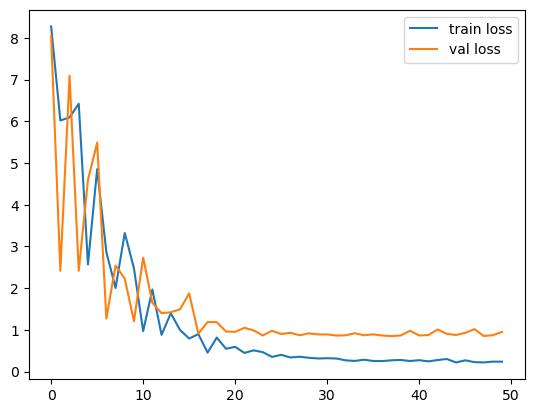

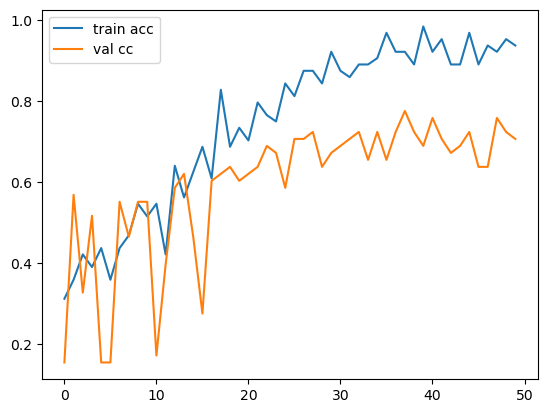

<Figure size 640x480 with 0 Axes>

In [36]:
#plot the loss
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#plot the accuracy
plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [37]:
#save the model as h5 file
from tensorflow.keras.models import load_model
model.save('car_resnet50.h5')

In [38]:
y_pred=model.predict(test_set)

In [39]:
y_pred

array([[6.58925865e-06, 1.28623287e-04, 9.99864817e-01],
       [4.84839082e-02, 6.98329926e-01, 2.53186196e-01],
       [1.02944151e-01, 8.52975249e-01, 4.40806560e-02],
       [3.66751351e-06, 9.93067748e-04, 9.99003232e-01],
       [3.98206785e-02, 8.65543783e-01, 9.46355462e-02],
       [8.21649060e-02, 8.25378112e-03, 9.09581304e-01],
       [2.18940541e-01, 2.79509008e-01, 5.01550496e-01],
       [2.08151415e-02, 9.14988101e-01, 6.41968325e-02],
       [4.22196537e-01, 2.01950178e-01, 3.75853300e-01],
       [6.68858737e-02, 6.32914126e-01, 3.00199986e-01],
       [3.32499929e-02, 2.99570413e-04, 9.66450453e-01],
       [2.33079409e-04, 9.82155383e-01, 1.76114272e-02],
       [3.05443499e-02, 2.91932553e-01, 6.77523077e-01],
       [2.96203308e-02, 3.35710526e-01, 6.34669185e-01],
       [9.60770667e-01, 1.26327537e-02, 2.65965294e-02],
       [2.72094235e-02, 1.07222155e-01, 8.65568459e-01],
       [4.06706221e-02, 2.19071686e-01, 7.40257740e-01],
       [8.95278692e-01, 4.35287

In [40]:
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([2, 1, 1, 2, 1, 2, 2, 1, 0, 1, 2, 1, 2, 2, 0, 2, 2, 0, 1, 2, 2, 0,
       1, 2, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 2, 2, 0, 1,
       1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1], dtype=int64)

In [41]:
model=load_model('car_resnet50.h5')

In [43]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))

In [44]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [45]:
x.shape

(224, 224, 3)

In [46]:
x=x/255

In [48]:
#expand the dimension of x
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [49]:
model.predict(img_data)

array([[4.456741e-04, 6.306696e-04, 9.989236e-01]], dtype=float32)

In [50]:
a=np.argmax(model.predict(img_data),axis=1)

In [52]:
a

array([2], dtype=int64)